In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('asset/train.csv')
spray_df = pd.read_csv('asset/spray.csv')
df_weather = pd.read_csv('asset/weather.csv')

IOError: File asset/train.csv does not exist

# EDA

In [4]:
# checking null vlaues
df.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [18]:
# Creating dummy variables for the weather data
df_weather.CodeSum = df_weather.CodeSum.apply(str.split)
for (i,list_) in enumerate(df_weather.CodeSum):
    for item in list_:
        if item not in df_weather.columns:
            df_weather[item] = 0
        df_weather.set_value(col=item,index=i,value=1)

In [6]:
# temp =df.groupby(['Trap', "Date"]).sum()
# t = temp[temp.NumMosquitos == 1]
# len(t[t.WnvPresent == 1])/float(len(t))

In [8]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,DZ,BCFG,FG+,MIFG,FG,SQ,SN,VCFG,GR,TadfdsafsdafdfasdfdsafdsR
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,0,0,0,0,0,0,0,0,0,test
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,0,0,0,0,0,0,0,0,0,test
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,0,0,0,0,0,0,0,0,0,test
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,0,0,0,0,0,0,0,0,0,test
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,0,0,0,0,0,0,0,0,0,test


In [9]:
df.groupby('Species').mean()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Species,,,,,,
CULEX ERRATICUS,10.000000,41.974689,-87.890615,9.000000,7.000000,0.000000
CULEX PIPIENS,32.799926,41.813402,-87.680481,7.424972,16.550945,0.088922
CULEX PIPIENS/RESTUANS,36.706439,41.848832,-87.705241,7.939604,13.945286,0.055135
CULEX RESTUANS,36.784307,41.859096,-87.713366,8.019708,8.551460,0.017883
CULEX SALINARIUS,32.627907,41.825134,-87.693788,7.767442,1.686047,0.000000
CULEX TARSALIS,30.500000,41.818023,-87.661568,7.500000,1.166667,0.000000
CULEX TERRITANS,36.900901,41.798297,-87.658375,7.599099,2.297297,0.000000


Looks like west nile is most prevelant in Culex Pipiens, but that could also be becuase there are more present per batch.

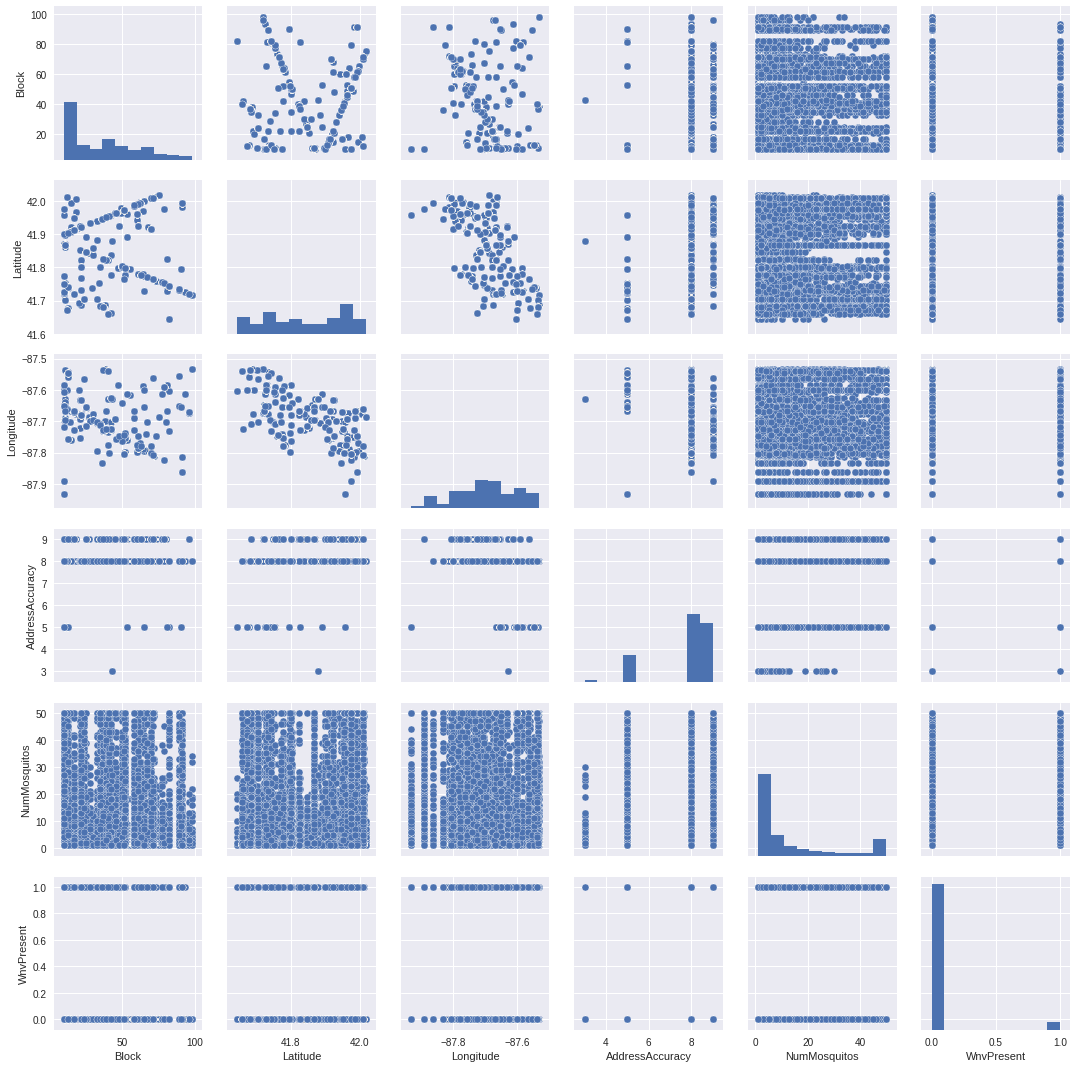

In [10]:
sns.pairplot(df)

In [11]:
df.groupby('Species').sum()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Species,,,,,,
CULEX ERRATICUS,10,41.974689,-87.890615,9,7,0
CULEX PIPIENS,88527,112854.372337,-236649.617578,20040,44671,240
CULEX PIPIENS/RESTUANS,174429,198865.648503,-416775.307552,37729,66268,262
CULEX RESTUANS,100789,114693.922296,-240334.622989,21974,23431,49
CULEX SALINARIUS,2806,3596.961565,-7541.665800,668,145,0
CULEX TARSALIS,183,250.908138,-525.969405,45,7,0
CULEX TERRITANS,8192,9279.221850,-19460.159333,1687,510,0


In [21]:
df_merge = df.merge(df_weather, on='Date')
df_merge = df_merge.drop(['Address', 'AddressNumberAndStreet','WnvPresent', 'NumMosquitos'], axis = 1)